# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [155]:
# this will help in making the Python code more structured automatically (good coding practice)

#load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import sklearn

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_squared_error
# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

Observation: NB_Black did not work even after following the guideline.

## Loading the dataset

In [94]:
df = pd.read_csv("Loan_Modelling.csv")
#Make a copy of the data to another data set personal loan
PersonaLoan=df.copy()
df.head()


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Overview

* Observations
* Sanity checks

Check the shape of the dataset

In [185]:
df.shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 5000 rows and 14 columns.


Information of Independent and Dependent Variables.

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observation:
Personal_loan is the Dependent Variable ( Target Attribute)
All the other variables except CCAVG are of int64


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

Criteria:
Problem definition, questions to be answered - 
Data background and contents - 
Univariate analysis - Bivariate analysis - 
Key meaningful observations for each of the plot

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
4995     0
4996    85
4997     0
4998     0
4999     0
Name: Mortgage, Length: 5000, dtype: int64>


<function matplotlib.pyplot.show(close=None, block=None)>

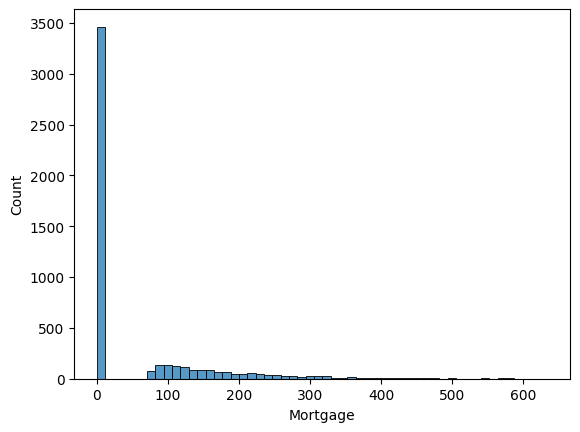

In [97]:
#Quesation1: Distribution of Mortgage Attributes
MortgageAttributeDistribution=df['Mortgage'].value_counts
print(MortgageAttributeDistribution)
sns.histplot(df['Mortgage'])
plt.show
#Answer 1:HistPlot shows most no of mortgage values for the customers are in 100 thousand dollars and 300 thousand dollars
#How many customers have credit cards?




<function matplotlib.pyplot.show(close=None, block=None)>

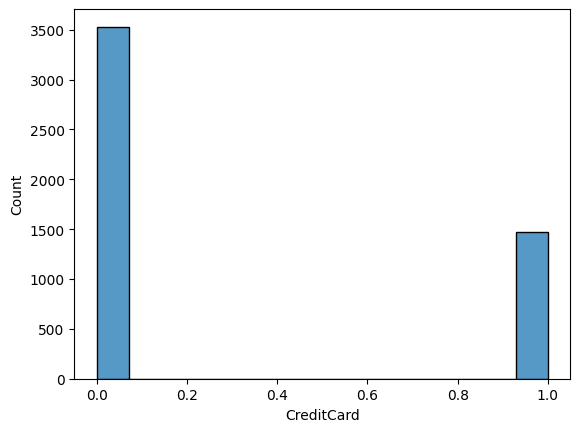

In [98]:
# Question 1: How many customers have credit cards?
sns.histplot(df['CreditCard'])
plt.show
#From the PLot this shows no of customers with credit cards are 1500.

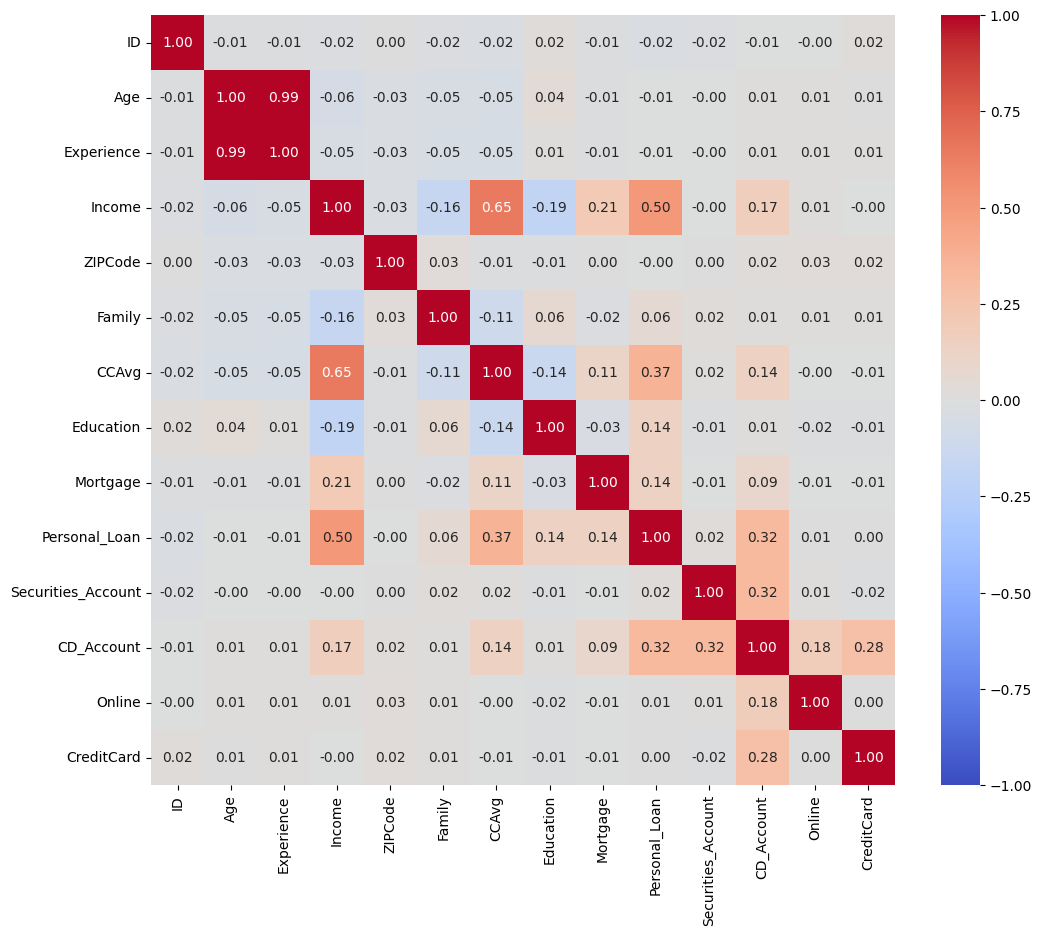

In [99]:
plt.figure(figsize=(12,10))
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()
#What are the attributes that have a strong correlation with the target attribute (personal loan)?
#Answer : From the Heatmap Personal loan attrbute has strong co relation with income and CCAvg (Average spending on credit cards per month (in thousand dollars)
#How does a customer's interest in purchasing a loan vary with their age?
#Answer: Customer's interest in purchasing a loan is kind of not having strong relationship( -0.01)
#How does a customer's interest in purchasing a loan vary with their education?
#Answer: 
#Personal loan and education are not stronly corelated.

In [ ]:
**UNIVARIATE ANALYSIS**

In [118]:
# function to plot a boxplot and a histogram along the same scale.
#Code Function re used from Course Examples

def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [187]:
# function to create labeled barplots
#Code Function re used from Course Examples


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [139]:
# function to plot stacked bar chart
#Code Function re used from Course Examples


def stacked_barplot(df, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

/var/folders/3g/c_4z31tj18s134ntscdzt1ym0000gn/T/ipykernel_49489/2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


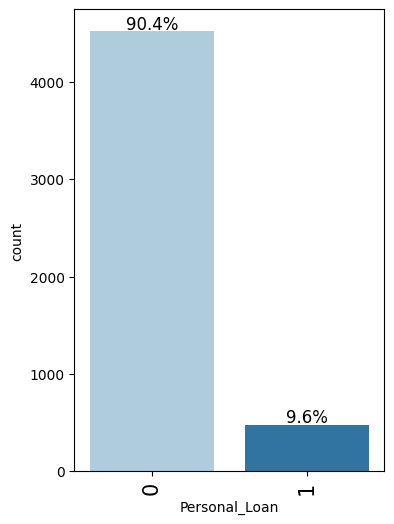

In [117]:
labeled_barplot(df, "Personal_Loan", perc=True)

Observation:
    Only 9.6% of exsiting customers  have personal Loans

/var/folders/3g/c_4z31tj18s134ntscdzt1ym0000gn/T/ipykernel_49489/2740624301.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


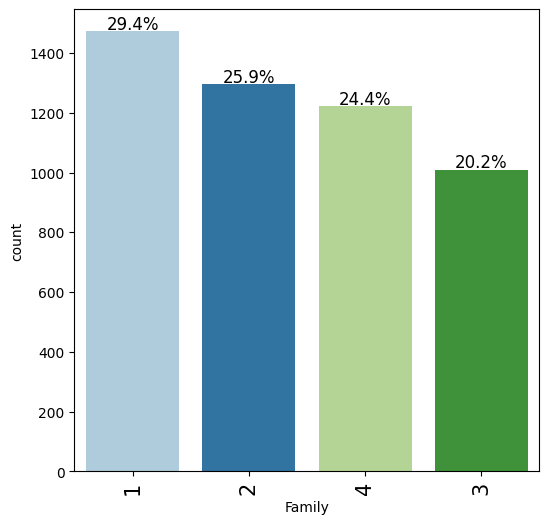

In [188]:
labeled_barplot(df, "Family", perc=True)

Obsrrvation :Family Size of 1 is more prominent customer

/var/folders/3g/c_4z31tj18s134ntscdzt1ym0000gn/T/ipykernel_49489/2740624301.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


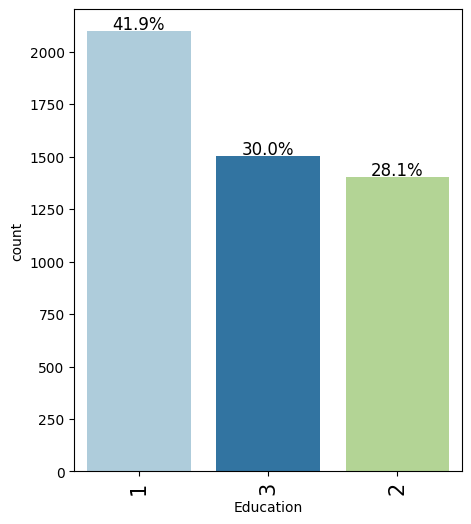

In [189]:
labeled_barplot(df, "Education", perc=True)

/var/folders/3g/c_4z31tj18s134ntscdzt1ym0000gn/T/ipykernel_49489/2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


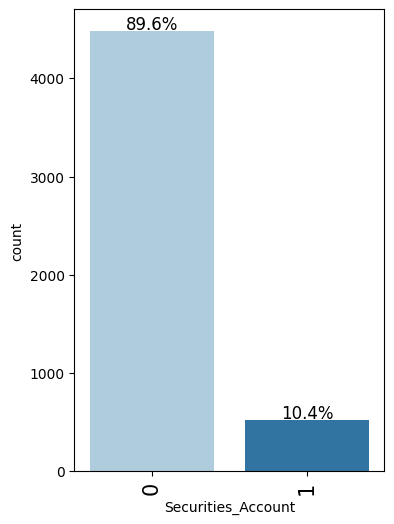

In [131]:
labeled_barplot(df, "Securities_Account", perc=True)

/var/folders/3g/c_4z31tj18s134ntscdzt1ym0000gn/T/ipykernel_49489/2740624301.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


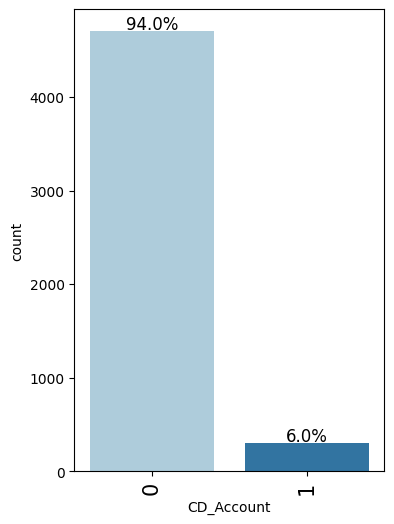

In [190]:
labeled_barplot(df, "CD_Account", perc=True)

/var/folders/3g/c_4z31tj18s134ntscdzt1ym0000gn/T/ipykernel_49489/2740624301.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


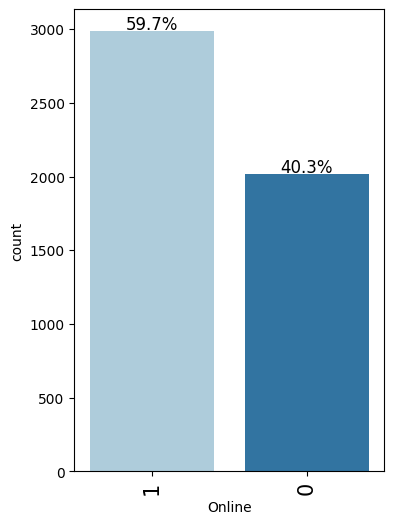

In [191]:
labeled_barplot(df, "Online", perc=True)

Observation : Most no of customers are  Online Customers

/var/folders/3g/c_4z31tj18s134ntscdzt1ym0000gn/T/ipykernel_49489/2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


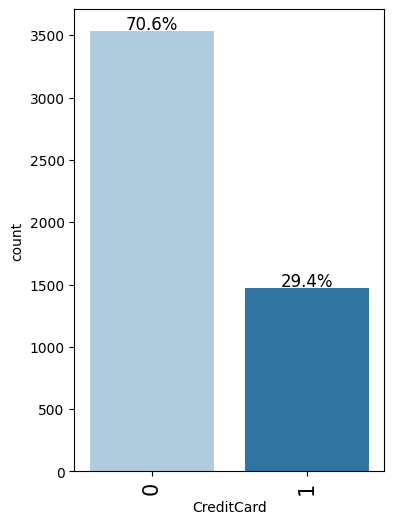

In [137]:
labeled_barplot(df, "CreditCard", perc=True)

In [ ]:
Observation: Most no customers are credit card holders.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [53]:
#Missing Value
PersonaLoan.isnull().sum()
#Answer: the Python command tells that there are no missing values in Pandas Data frame


ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#Feature engineering (if needed)

In [59]:
#Outlier detection and treatment (if needed)


In [ ]:
#Preparing data for modeling


In [ ]:
#Any other preprocessing steps (if needed)

## Model Building

In [144]:
#Defining the Indepenedent and dependenet variables 
#Personal Loan is chosen as depnedent Variable from the problem statement.
X = df.drop(["Personal_Loan"], axis=1)
y = df["Personal_Loan"]

In [145]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


**Creating Training and testing Set**

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
#Check no of roows in train and shape data

In [148]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3000
Number of rows in test data = 2000


Observation: There were 5000 rows in the original dataset, out of 5000 rows, 3000 are selected as training and 2000 as test data sets.

In [149]:
#Percenatge of classes in  trainining set refers to the distribution of different classes or categories within that set
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
Personal_Loan
0    0.904333
1    0.095667
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.9035
1    0.0965
Name: proportion, dtype: float64


### Model Evaluation Criterion

Model performance evaluation
Model can make wrong predictions as:
Predicting a customer will not take personal loan  but in reality the customer would be very interested to avail loan.

Predicting a customer will take loan but in reality the customer would not take the loan

Which case is more important?
Case 1 is more important as that directly impacts the bank for not missed opportunity and loss

### Model Building

**Builing Decsion Tree Models**

In [194]:
model0 = DecisionTreeClassifier(criterion="gini", random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [195]:
#Feature sets for Decison Tree
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


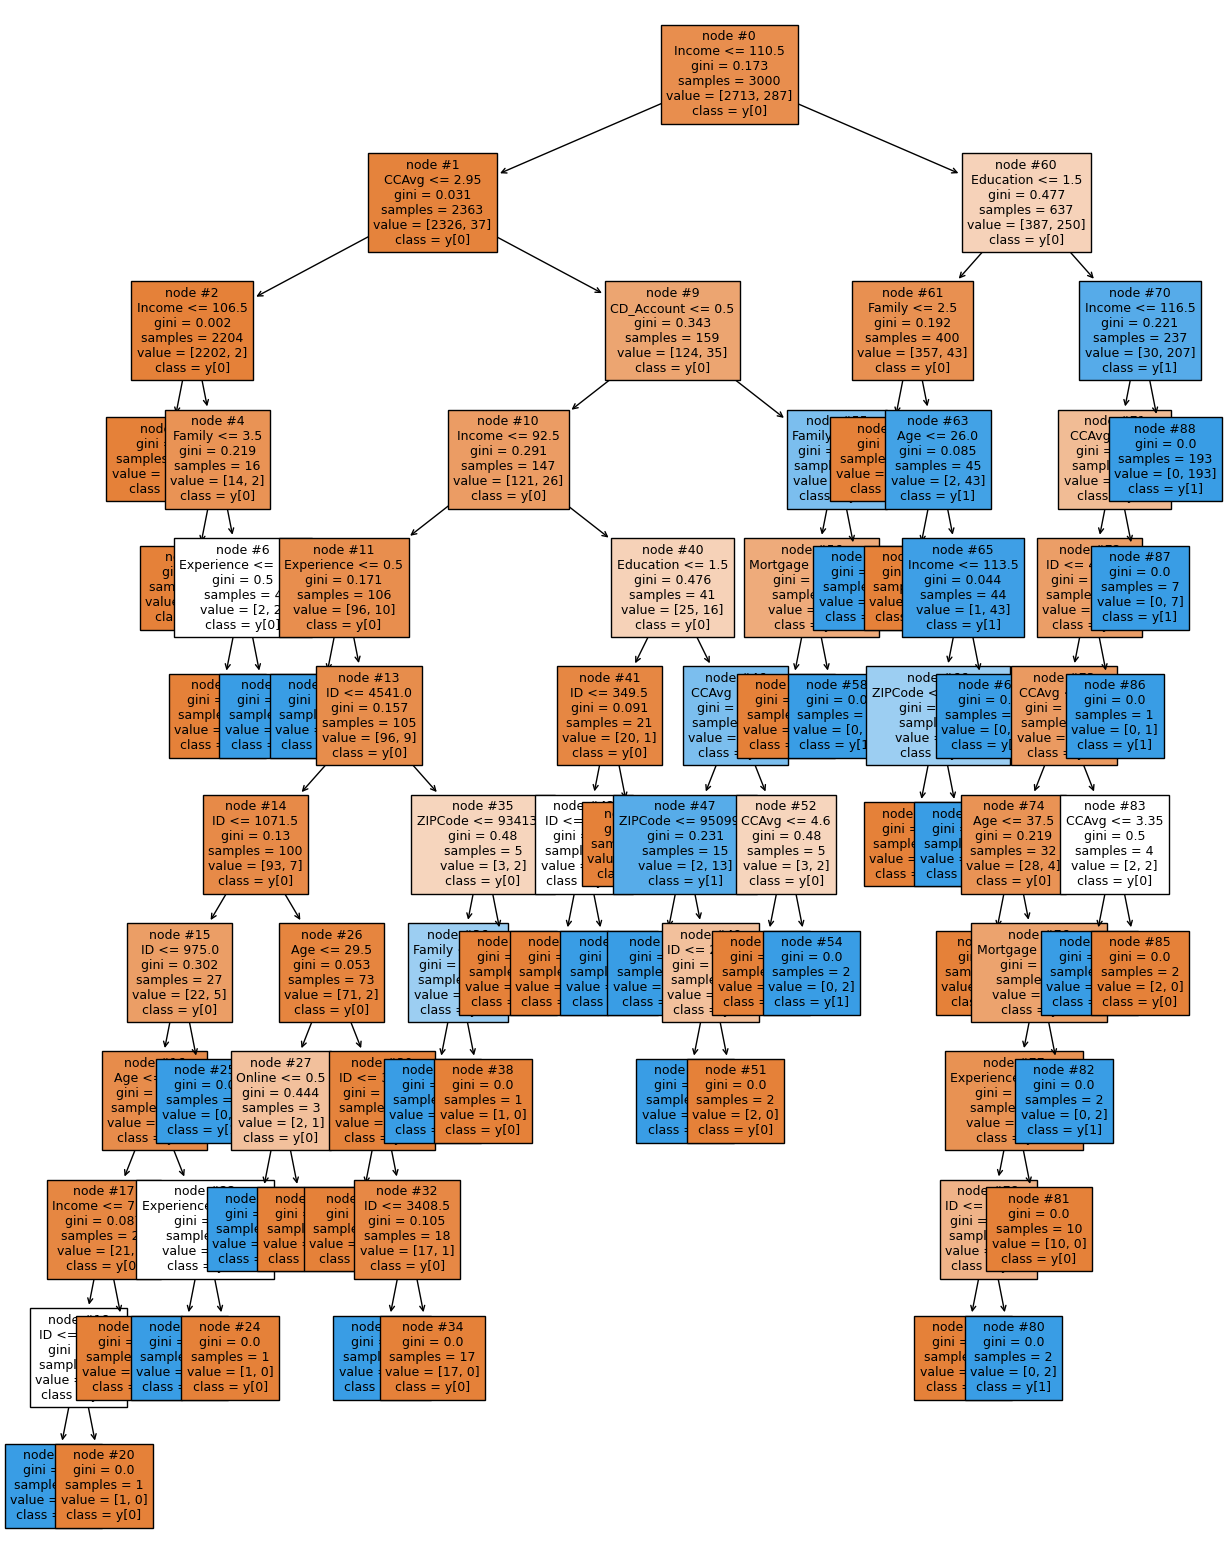

In [196]:
#Plotting the decison Tree
plt.figure(figsize=(15, 20))

out = tree.plot_tree(
    model0,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

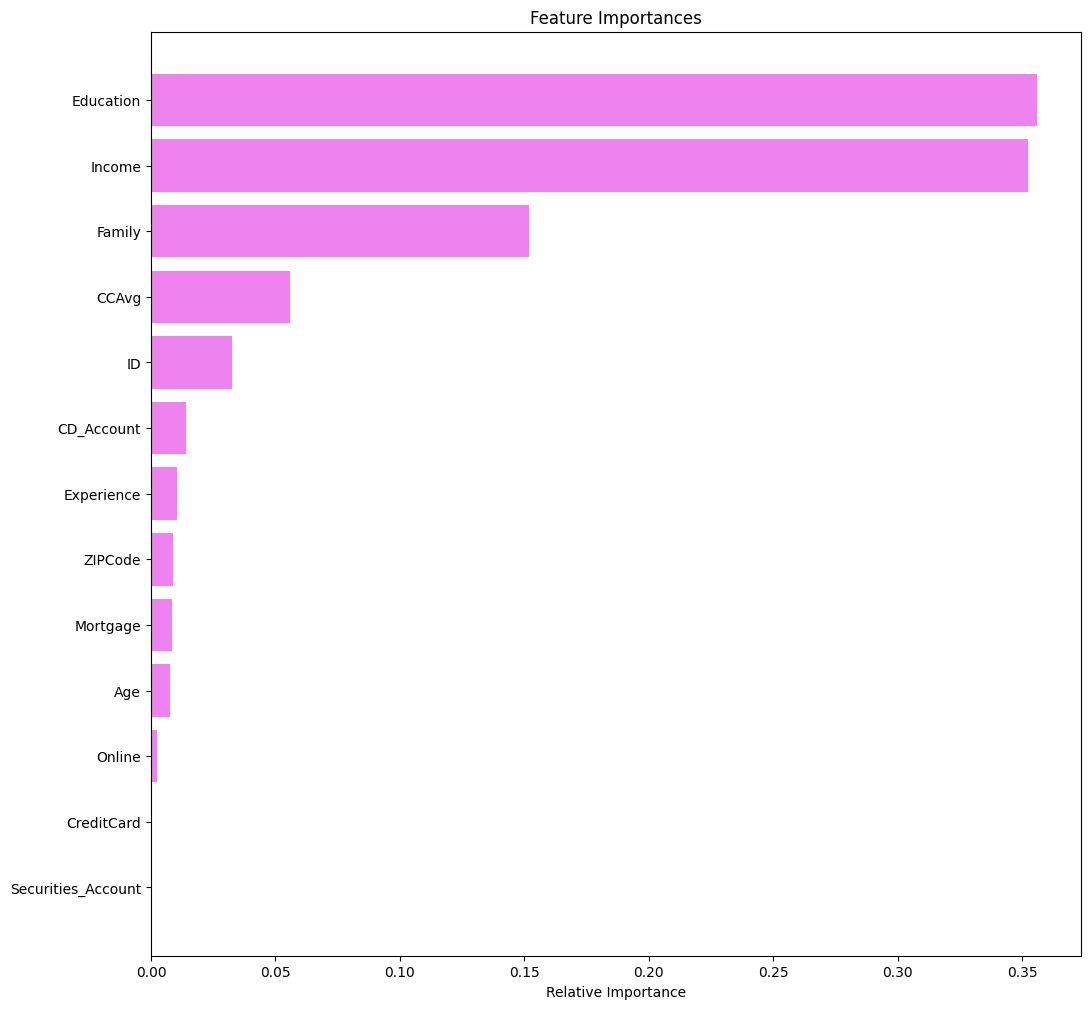

In [172]:
#Code Resused from Course Examples
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation: Education,Income and Family size are three main Features in Personal Loan decisions.

In [177]:
#Functions Reused from Course Examples
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

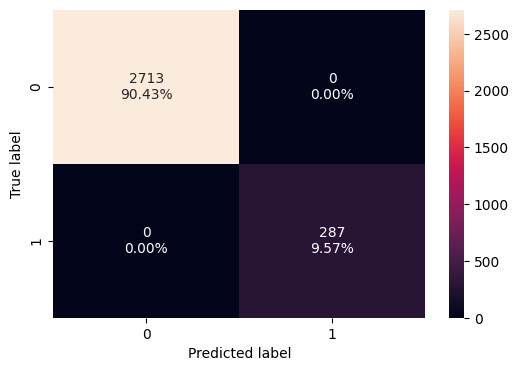

In [197]:
confusion_matrix_sklearn(model0, X_train, y_train)

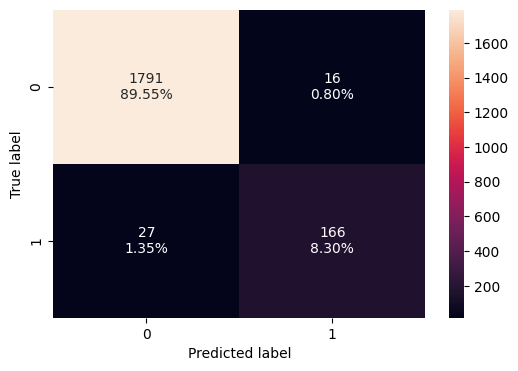

In [198]:
confusion_matrix_sklearn(model0, X_test, y_test)

**Decsion Tree Pre Pruning**

In [180]:
#Code Reused from One of the Couse Solutions to calculate Performance metrics
#Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

/Users/somenathmukherjee/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/somenathmukherjee/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/somenathmukherjee/miniconda3/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/somenathmukherjee/miniconda3/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_param

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=1e-06,
                       random_state=1)

In [174]:
#Functions Resused from Course Examples
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

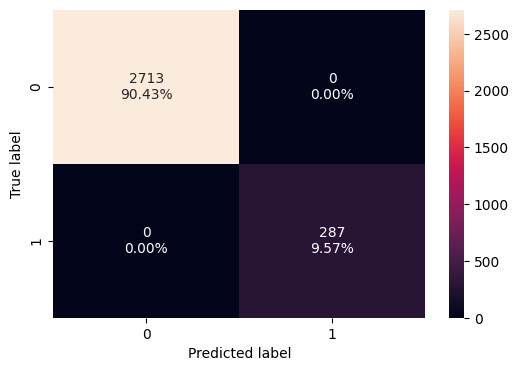

In [199]:
confusion_matrix_sklearn(model0, X_train, y_train)

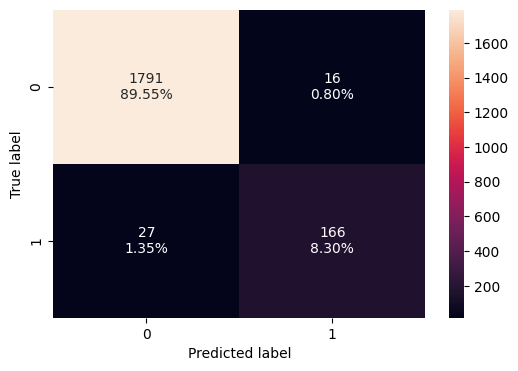

In [200]:
confusion_matrix_sklearn(model, X_test, y_test)

**Decision Tree after Pre Pruning

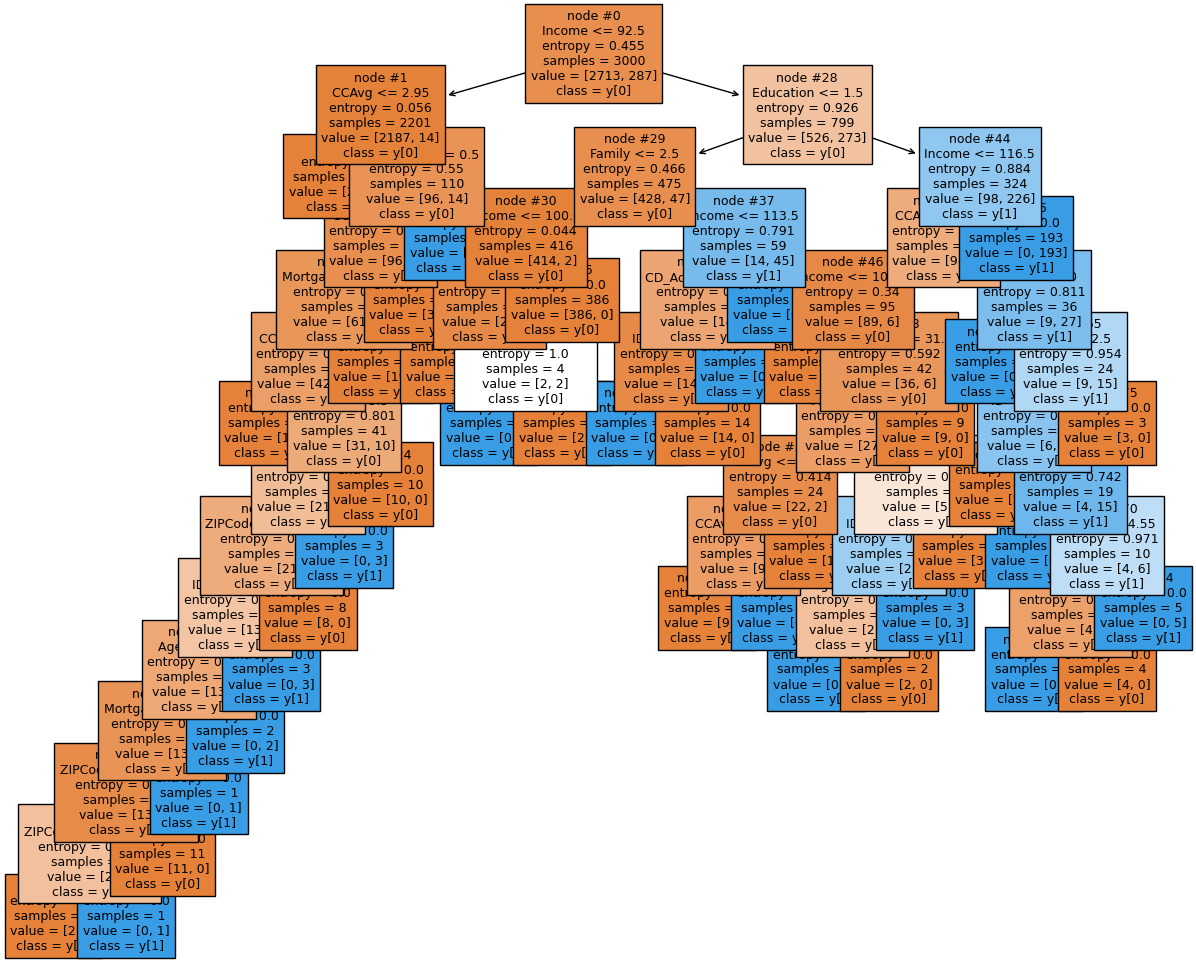

In [169]:
#Decision Tree after Pre Pruning

plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [183]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2091.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |--- weights: [11.00, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |   |   |   |--- ZIPCode <= 94352.50
|   |   |   |   |   |   |   |   |   |--- ID <= 3721.50
|   |   |   |   |   |   |   |   |   |   |--- Age <= 57.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- Age >  57.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |   |--- ID >  3721.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |   |   |   |   |---

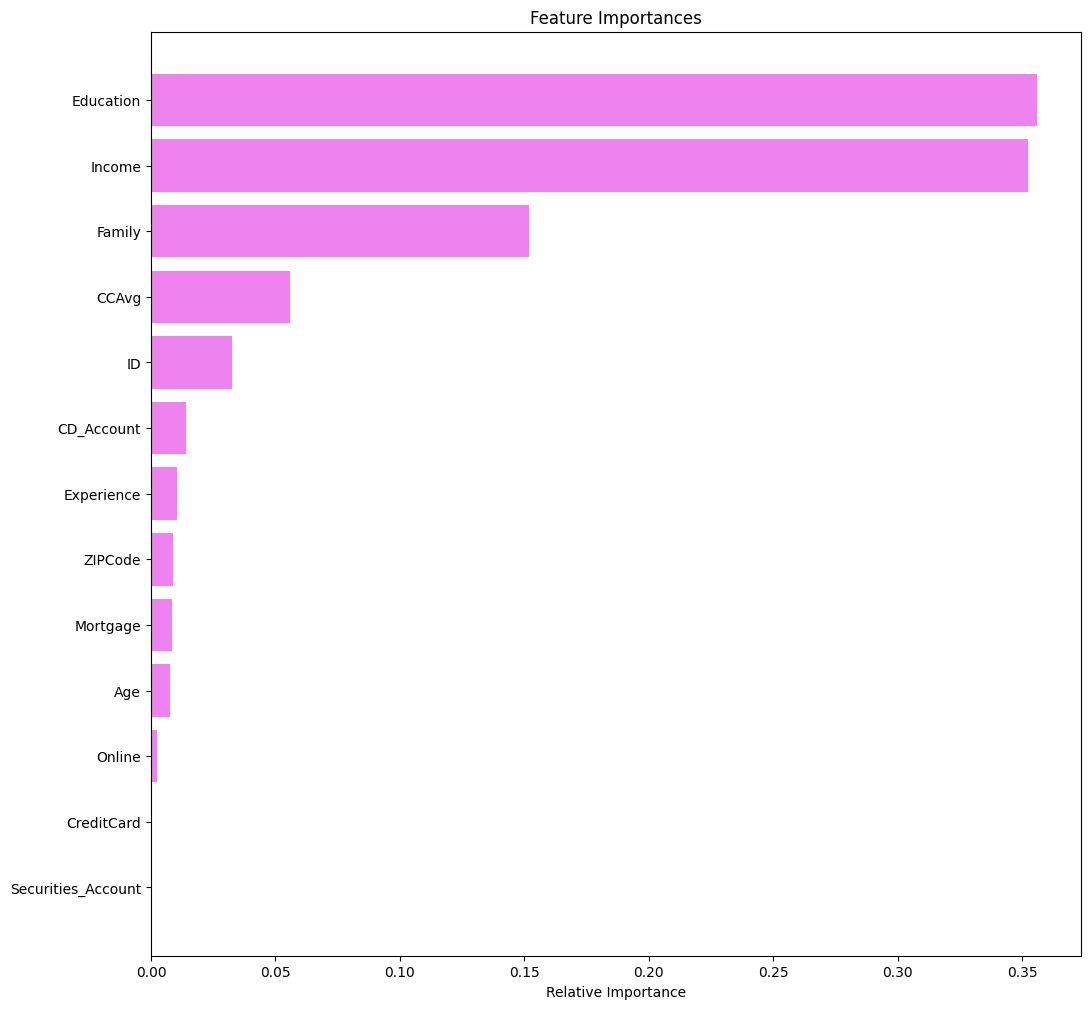

In [184]:
#Code Resused from Course Examples
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations after pre pruning: Feature Importance not changed after Pre pruning
Decision tree much simpplified after pre pruning.

## Model Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

The  model built can be used to predict if a customer will be converted to personal loan customer or not.

Education , Income and Family are three most important features in Decion Tree.

There can be other observations from the Decision tree which was not easy to find from the Decision tree graph.

___